## Happy Customers

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Download Data:

https://drive.google.com/open?id=1KWE3J0uU_sFIJnZ74Id3FDBcejELI7FD

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

### 1. Loading data

In [124]:
# Loading some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [125]:
# Load data into the Jupyter notebook
happ_df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [126]:
happ_df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### 2. Exploratory Data Analysis

In [127]:
# Look at the mean, standard deviation, and quartiles of the data
print(happ_df.describe())

                Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  126.000000  
mean     4.253968  
std      0.809311  
min      1.000000  
25%      4.000000  
50%      4.000000  
75%      5.000000  
max      5.000000  


From looking at the quartiles, it is apparent that the variables are pretty skewed. So we may want to standardize the features to a mean of 0 and an s.d. of 1

<Axes: xlabel='Y', ylabel='Count'>

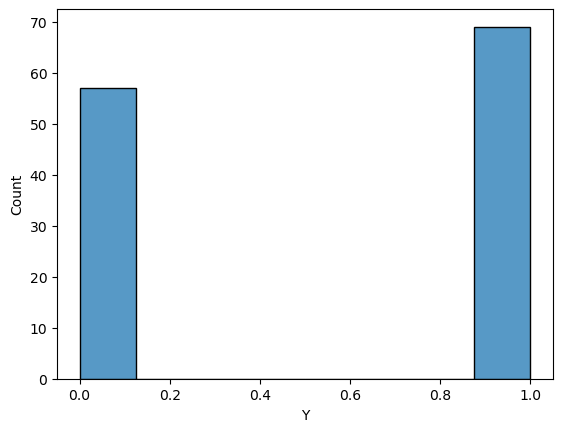

In [128]:
# Examining the labels
sns.histplot(x=happ_df['Y'])


It is clear that the data is slightly imbalanced with more people being happy than unhappy. This is not surprising given the skewed distiributions of variables in our survey indicating that most customers rated the service highly.

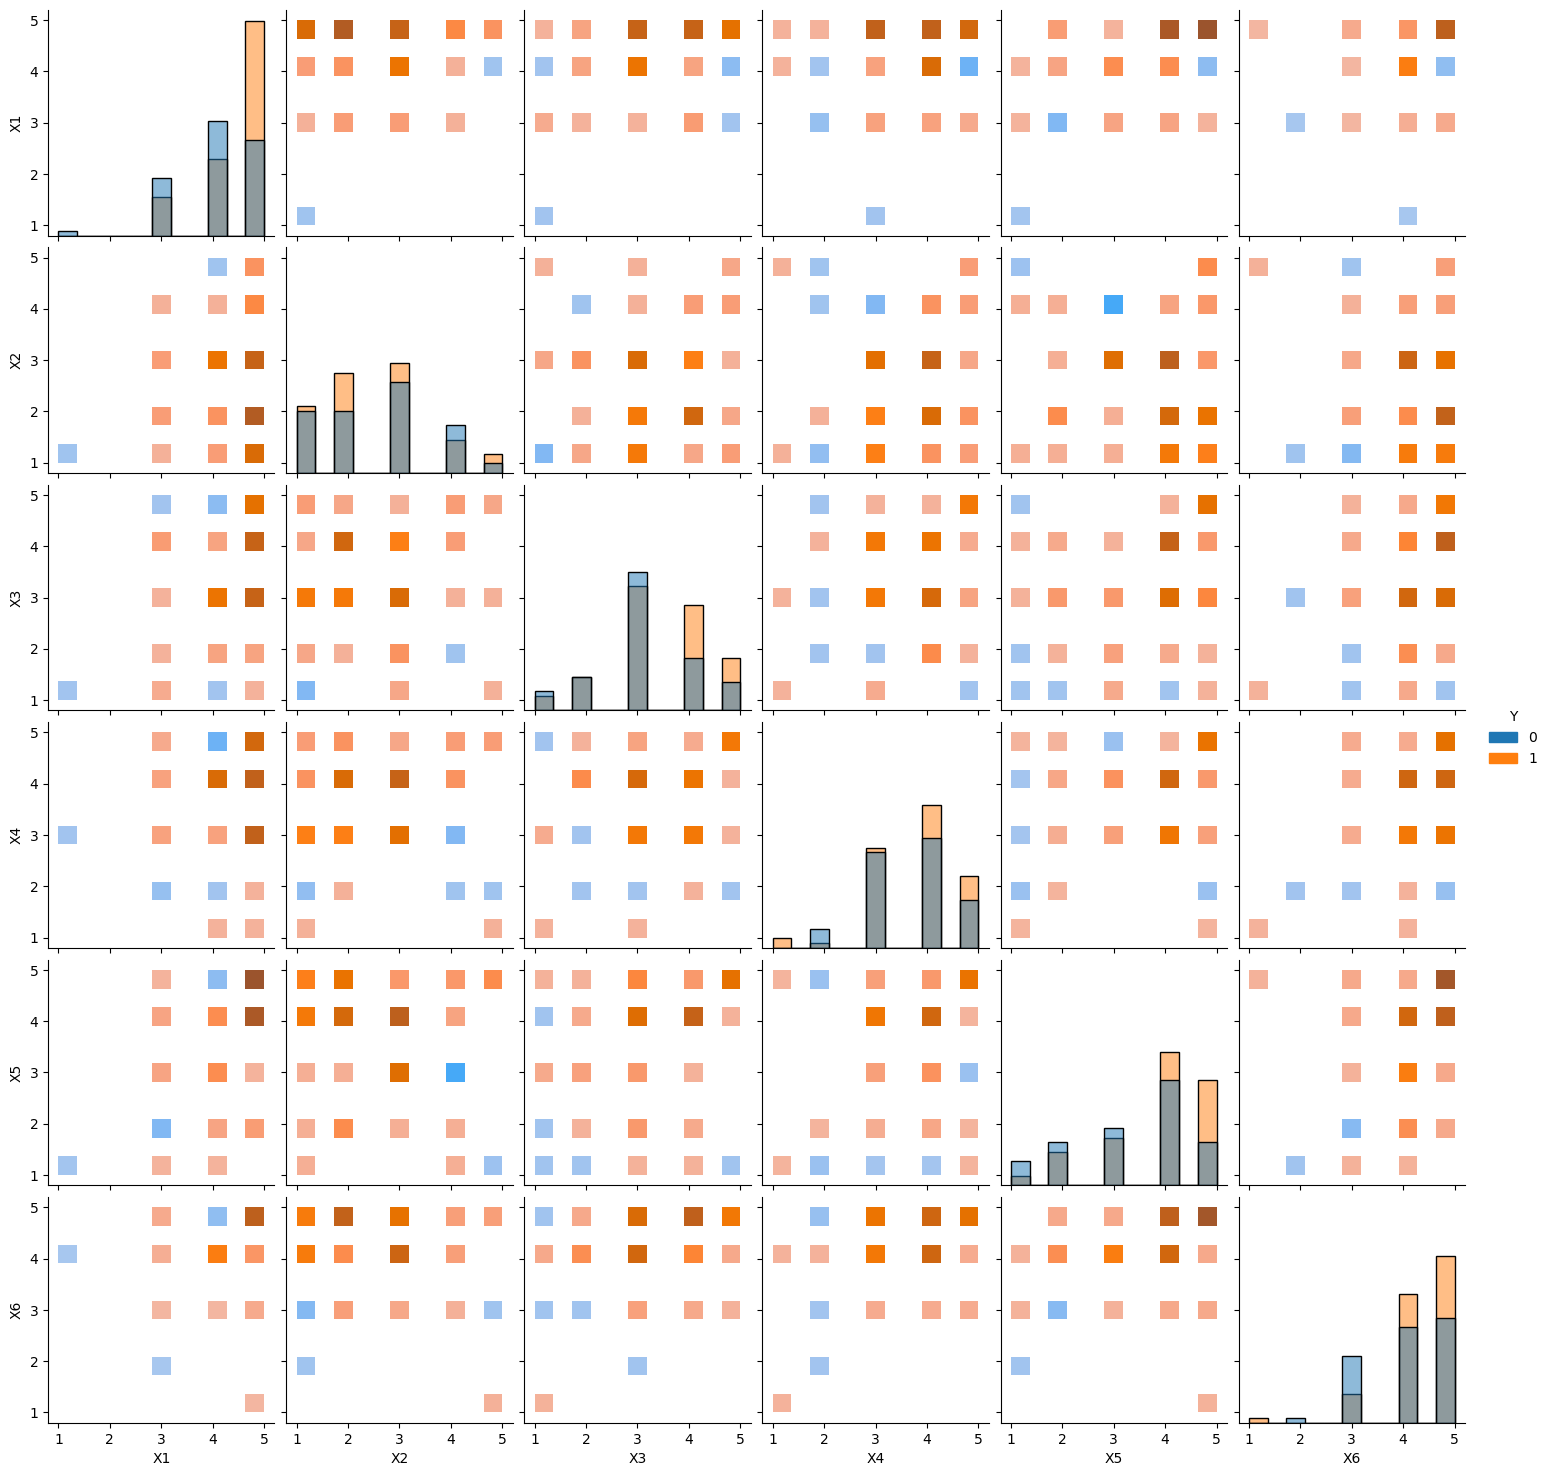

In [7]:
# Vizualizing the bivariate relationships between the features
sns.pairplot(happ_df, kind = 'hist', hue = "Y")

### 3. Data Preprocessing & Modeling

In [171]:
# Seperating the features and the labels of the dataset
y = happ_df['Y']
X = happ_df.drop(['Y'], axis = 1)

In [172]:
# Shuffling the data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state = 0)

In [207]:
# First let's try a decision tree classifier as it can naturally handle categorical and ordinal data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=0)
print("Accuracy: {}".format(np.mean(cross_val_score(dt_clf, X, y, cv=20, n_jobs=2))))

Accuracy: 0.55


In [219]:
# Fine tuning the decision tree classifier for optimal hyperparameters using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier(random_state=0)



param_grid_dt = {"criterion": ["gini", "entropy", "log_loss"], 
                 "splitter": ["best", "random"], 
                 "max_depth": [None, 2, 4, 6, 8],
                 "min_samples_split": [2, 5, 10], 
                 "min_samples_leaf": [1, 2, 5, 10], 
                 "max_features": [None, "auto", "sqrt", "log2"]}

grid_search_dt = GridSearchCV(dt_clf, param_grid_dt, cv=5, n_jobs=2)

print("Accuracy: {}".format(np.mean(cross_val_score(grid_search_dt, X, y, cv=20, n_jobs=2))))
                 

Accuracy: 0.6023809523809525


In [173]:
# First lets try a random forest model as it has very good performance on classification tasks and generally has very few hyperparameters to tune
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline([("standarize ", StandardScaler()),
                 ("rfc", RandomForestClassifier(n_estimators =100))])

print("Accuracy: {}".format(np.mean(cross_val_score(pipe_rf, X, y, cv=20, n_jobs=2))))

Accuracy: 0.5869047619047619


In [182]:
# Building  a pipeline to scale the data and fit an logistic regression model. In this model we will use the default threshold of 0.5 and set a search for the best hyperparameter C.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform

# Perform hyperparameter tuning on pipeline estimator
pipe_lg = Pipeline([("standarize ", StandardScaler()),
                 ("logreg", LogisticRegression())])

param_grid_lg = {'logreg__C': loguniform(1e-5, 1e5)}# 10^-5 to 10^5

gs_est_lg = RandomizedSearchCV(pipe_lg, param_grid_lg, cv=3, n_jobs=2, verbose=1, random_state=10, n_iter=100, refit=True)
print("Accuracy: {}".format(np.mean(cross_val_score(gs_est_lg, X, y, cv=20, n_jobs=2))))

Accuracy: 0.536904761904762


Now let us see if rank hot encoding of the responses will give us higher accuraccy

In [175]:
# Function to create a rank hot encoding of the features

import numpy as np
def rank_hot_encoder(X, max_rank=5):
    # Ensure X is 2D
    X = np.array(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    num_samples, num_features = X.shape
    encoded = np.zeros((num_samples, max_rank * num_features), dtype=int)
    
    for i in range(num_samples):
        for j in range(num_features):
            rank = int(X[i, j])
            encoded[i, j*max_rank : j*max_rank + rank] = 1
            
    return encoded



In [176]:
# Now let us use both original features and one-hot encoded features to fit a logistic regression model. We will use the same hyperparameter tuning as before.
# Pipeline for one-hot encoding the featurs
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform

rank_hot_transformer = FunctionTransformer(rank_hot_encoder, kw_args={'max_rank': 5})
feature_union = FeatureUnion([
    ('rankhotfeatures', rank_hot_transformer),
    ('scaledfeatures', StandardScaler())
])


# Perform hyperparameter tuning on pipeline estimator
pipe_lg = Pipeline([("preprocessor", feature_union),
                 ("logreg", LogisticRegression(penalty='l1', solver='liblinear'))])


param_grid_lg = {'logreg__C': loguniform(1e-5, 1e5),# 10^-5 to 10^5
 'logreg__penalty': ['l1', 'l2']}# 10^-5 to 10^

gs_est_lg = RandomizedSearchCV(pipe_lg, param_grid_lg, cv=3, n_jobs=2, verbose=1, random_state=10, n_iter=1000, refit=True)
print("Accuracy: {}".format(np.mean(cross_val_score(gs_est_lg, X, y, cv=20, n_jobs=2))))

Accuracy: 0.6166666666666667


In [177]:
# Now let us use both original features and one-hot encoded features to fit a random forest model. We will use the same hyperparameter tuning as before.
# Pipeline for one-hot encoding the featurs
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

rank_hot_transformer = FunctionTransformer(rank_hot_encoder, kw_args={'max_rank': 5})
feature_union = FeatureUnion([
    ('rankhotfeatures', rank_hot_transformer),
    ('scaledfeatures', StandardScaler())
])


# Perform hyperparameter tuning on pipeline estimator
pipe_rf = Pipeline([("preprocessor", feature_union),
                 ("rf", RandomForestClassifier(n_estimators=100))])


param_grid_rf = {'rf__max_features':["sqrt", "log2", None]}# 10^-5 to 10^5

gs_est_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=3 ,n_jobs=2, verbose=1, refit=True)
print("Accuracy: {}".format(np.mean(cross_val_score(gs_est_rf, X, y, cv=20, n_jobs=2))))

Accuracy: 0.5797619047619048


We achieved a performance of 62% on the data using ridge logistic regression and 58% using a Random Forest classifier with a 20 fold cross-validation and augmenting the features/. Now we can try to see if the performance is improved by also optimizing the threshold.

In [178]:
# Lets build a custom classifier that will allow us to set the threshold for the Random Forest Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion


class CustomerModelRF(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_estimators = 100, max_features = "sqrt", threshold = 0.5):
        self.threshold = threshold
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.rf = RandomForestClassifier(n_estimators =self.n_estimators, max_features = self.max_features)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.rf.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.rf.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = np.vstack((self.rf.predict_proba(X)[:,1] < self.threshold, self.rf.predict_proba(X)[:,1] > self.threshold))
        return(probs.astype(int))


In [179]:
# Perform hyperparameter tuning as well as threshold selection on pipeline estimator
from scipy.stats import uniform

rank_hot_transformer = FunctionTransformer(rank_hot_encoder, kw_args={'max_rank': 5})
feature_union = FeatureUnion([
    ('rankhotfeatures', rank_hot_transformer),
    ('scaledfeatures', StandardScaler())
])

pipe_rf = Pipeline([("preprocessor", feature_union),
                 ("RFmdl", CustomerModelRF())])

param_grid_rf = {'RFmdl__threshold': uniform(0.2, 0.8),
                 'RFmdl__max_features':["sqrt", "log2", None]}# 10^-5 to 10^5}


gs_est_rf_td = RandomizedSearchCV(pipe_rf, param_grid_rf,  cv=3, n_jobs=2, verbose=1, random_state=0, n_iter=30, scoring='accuracy', refit=True)
print("Accuracy: {}".format(np.mean(cross_val_score(gs_est_rf_td, X, y, cv=20, n_jobs=2))))


Accuracy: 0.588095238095238


In [180]:
# Lets build a custom classifier that will allow us to set the threshold for the logistic regression model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression

class CustomerModelLR(BaseEstimator, ClassifierMixin):
    
    def __init__(self, C=1, penalty ='l1', threshold = 0.5):
        self.C = C
        self.threshold = threshold
        self.penalty = penalty
        self.lr = LogisticRegression(C=self.C, penalty = self.penalty, solver='liblinear')

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.lr.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.lr.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = np.vstack((self.lr.predict_proba(X)[:,1] < self.threshold, self.lr.predict_proba(X)[:,1] > self.threshold))
        return(probs.astype(int))


In [241]:
# Perform hyperparameter tuning as well as threshold selection on pipeline estimator
from scipy.stats import uniform, loguniform

rank_hot_transformer = FunctionTransformer(rank_hot_encoder, kw_args={'max_rank': 5})
feature_union = FeatureUnion([
    ('rankhotfeatures', rank_hot_transformer),
    ('scaledfeatures', StandardScaler())
])

pipe_lr = Pipeline([("preproceesor", feature_union),
                 ("logregmdl", CustomerModelLR())])

param_grid_lr = {'logregmdl__C':  loguniform(1e-5, 1e5), 
                 'logregmdl__penalty': ['l1', 'l2'],
                 'logregmdl__threshold': uniform(0.2, 0.8)}


gs_est_lr_td = RandomizedSearchCV(pipe_lr, param_grid_lr,  cv=3, n_jobs=2, verbose=1, random_state=0, n_iter=1000, scoring='accuracy', refit = True)
print("Accuracy: {}".format(np.mean(cross_val_score(gs_est_lr_td, X, y, cv=20, n_jobs=2))))


Accuracy: 0.5535714285714286


The performance of our Logistic Regression and Random Forest has reduced with tuning of the optimal threshold.

Finally, let us work on the CATBOOST model, which usually has good performance and gives us measures of feature importance.

In [220]:
# Implementing CatBoost Classifier as it achieves good performance while providing estimates of classifier performance

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_cb = Pipeline([("preproceesor", feature_union),
                 ("CBmdl", CatBoostClassifier(iterations=2,
                           learning_rate=0.4,
                           depth=2, verbose=False))])

# Perform hyperparameter tuning as well as threshold selection on pipeline estimator

param_grid ={
 'CBmdl__iterations': [2, 5, 10, 20],
    'CBmdl__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7],
    'CBmdl__depth': [1, 2, 5, 10]}
    
# Inner cross-validation for parameter search
gs_cb = GridSearchCV(pipe_cb, param_grid=param_grid, cv=5, n_jobs=2, scoring='accuracy',  refit=True)
print("Accuracy: {}".format(np.mean(cross_val_score(gs_cb, X, y, cv=20))))



Accuracy: 0.6154761904761905


In [235]:
# Implementing a custom CatBoost Classifier that will allow us to set the threshold for the CatBoost model. This will allow us to tune the threshold to maximize the accuracy of the model.
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
class CustomerModelCB(BaseEstimator, ClassifierMixin):
    
    def __init__(self, iterations= 2, learning_rate = 0.4, depth = 2, threshold = 0.5):

        self.cb = CatBoostClassifier(iterations=self.iterations, learning_rate = self.learning_rate, depth = self.depth, verbose = False)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.cb.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.cb.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = np.vstack((self.cb.predict_proba(X)[:,1] < self.threshold, self.cb.predict_proba(X)[:,1] > self.threshold))
        return(probs.astype(int))


In [238]:
# Lets build a custom classifier that will allow us to set the threshold for the Random Forest Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from catboost import CatBoostClassifier

class CustomerModelCB(BaseEstimator, ClassifierMixin):
    
    def __init__(self, iterations= 5, learning_rate = 0.4, depth = 2, threshold = 0.5):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.depth = depth
        self.threshold = threshold
        self.cb = CatBoostClassifier(iterations=self.iterations, learning_rate = self.learning_rate, depth = self.depth, verbose = False)


    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.cb.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.cb.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = np.vstack((self.cb.predict_proba(X)[:,1] < self.threshold, self.cb.predict_proba(X)[:,1] > self.threshold))
        return(probs.astype(int))


In [247]:
# Implementing CatBoost Classifier as it achieves good performance while providing estimates of classifier performance

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

rank_hot_transformer = FunctionTransformer(rank_hot_encoder, kw_args={'max_rank': 5})
feature_union = FeatureUnion([
    ('rankhotfeatures', rank_hot_transformer),
    ('scaledfeatures', StandardScaler())
])

pipe_cb = Pipeline([("preproceesor", feature_union),
                 ("CBmdl", CustomerModelCB())])

# Perform hyperparameter tuning as well as threshold selection on pipeline estimator

param_grid_cb ={
 'CBmdl__iterations': [2, 5, 10],
    'CBmdl__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'CBmdl__depth': [1, 2, 5],
    'CBmdl__threshold': [0.40, 0.45, 0.5, 0.55, 0.60]}
    
# Inner cross-validation for parameter search
gs_cb = GridSearchCV(pipe_cb, param_grid_cb, cv=5, n_jobs=2, scoring='accuracy')
print("Accuracy: {}".format(np.mean(cross_val_score(gs_cb, X, y, cv=20, n_jobs=2))))



Accuracy: 0.5309523809523808


The highest accuracy I was able to achieve is around 60%

### 5. Feature Importance

Finally lets get some information about feature importance from the implemented CatBoost Classifier

In [262]:
# Fitting the CB model with the best hyperparameters and threshold and then extracting the feature importances
# Implementing CatBoost Classifier as it achieves good performance while providing estimates of classifier performance

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_cb = Pipeline([("standardize", StandardScaler()),
                 ("CBmdl", CatBoostClassifier(iterations=2,
                           learning_rate=0.4,
                           depth=2, verbose=False))])

# Perform hyperparameter tuning as well as threshold selection on pipeline estimator

param_grid ={
 'CBmdl__iterations': [2, 5, 10, 20],
    'CBmdl__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7],
    'CBmdl__depth': [1, 2, 5, 10]}
    
# Inner cross-validation for parameter search
gs_cb_best = GridSearchCV(pipe_cb, param_grid=param_grid, cv=5, n_jobs=2, scoring='accuracy',  refit=True)

# Fit the model
gs_cb_best.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                       ('CBmdl',
                                        <catboost.core.CatBoostClassifier object at 0x000001AD18143150>)]),
             n_jobs=2,
             param_grid={'CBmdl__depth': [1, 2, 5, 10],
                         'CBmdl__iterations': [2, 5, 10, 20],
                         'CBmdl__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7]},
             scoring='accuracy')

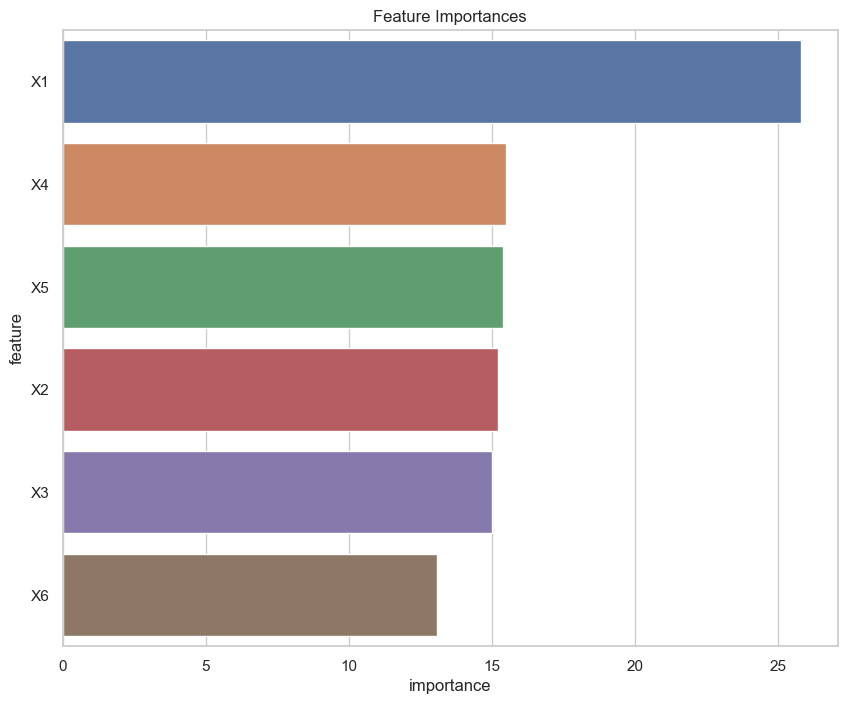

In [263]:
# Visualizing the feature importances scores
feature_importances = gs_cb_best.best_estimator_.named_steps['CBmdl'].get_feature_importance()
feature_names = X.columns
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_df, x='importance', y='feature')
plt.title('Feature Importances')
plt.show()  

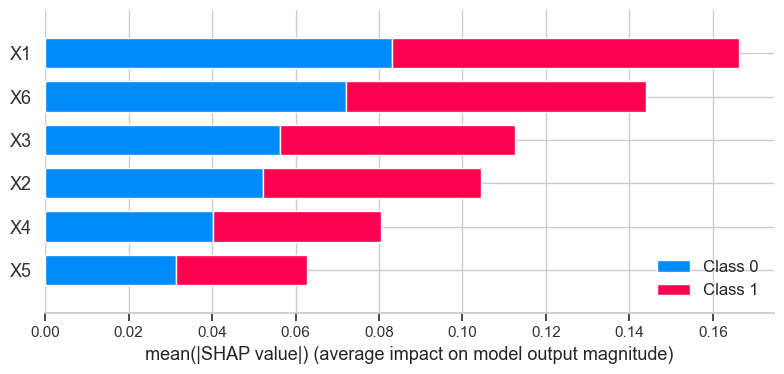

In [ ]:
# To confirm, let us look at the feature importances using SHAP and the Random Forest model 
# Split into train and test 
from sklearn.model_selection import train_test_split
import shap
shap.initjs()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


All things considered, it looks like the feature "X1= my order was delivered on time" is most importance as is to be expected. Random forest using SHAP further considers " X6 = the app makes ordering easy for me" as being more predictive of the outcome of whether they are happy or not.